# Coursework 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [3]:
def linear_dynamics(A, vmin=-1, vmax=1, step=0.1):
    # The mpl streamplot requires the values of x to be equal
    X = np.mgrid[vmin:vmax:step, vmin:vmax:step][::-1]
    X_dot = np.einsum("ij,jnm->inm", A, X)
    return X, X_dot

## 6.3.1

For the following system, find the fixed points, sketch the nullclines, the vector field and a plausible phase portrait

$$
    \dot x = x - y\\
    \dot y = x^2 - 4
$$

In [4]:
A = np.array([
    [1, -1],
    [-4,  0]
])

evalues, evecs = eig(A)
evalues

array([ 2.56155281, -1.56155281])

In [6]:
evecs

array([[ 0.5392856 ,  0.36365914],
       [-0.84212294,  0.93153209]])

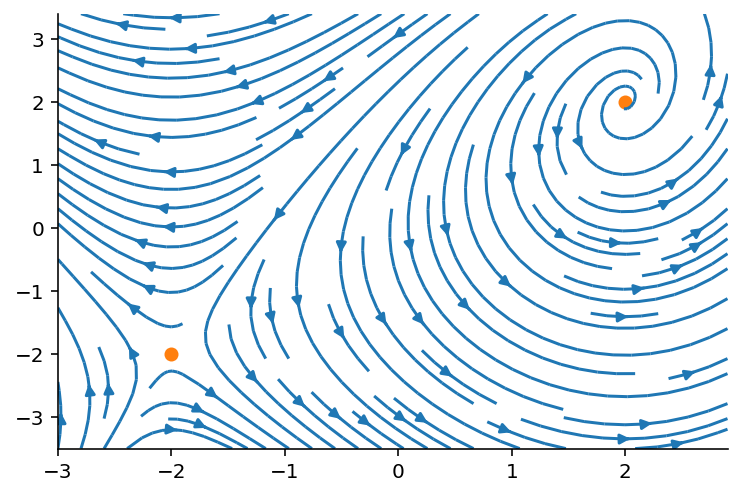

In [7]:
X = np.mgrid[-3.5:3.5:0.1, -3:3:0.1][::-1]

def f(X):
    x, y = X
    return x - y, x ** 2 - 4

Xdot = np.apply_along_axis(f, 0, X)

plt.streamplot(*X, *Xdot, density=1)
plt.scatter(2, 2, c="tab:orange")
plt.scatter(-2, -2, c="tab:orange")

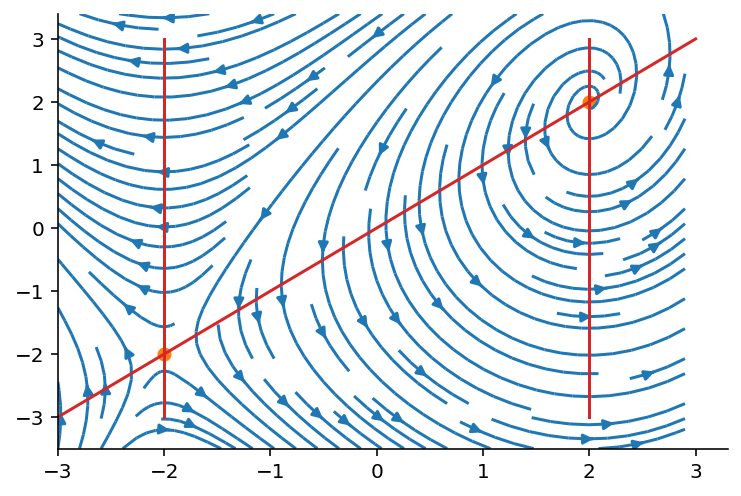

In [8]:
nullcline = np.linspace(-3, 3, 20)
plt.streamplot(*X, *Xdot, density=1)
plt.plot(nullcline, nullcline, c="tab:red")
plt.plot(np.ones(20) * 2, nullcline, c="tab:red")
plt.plot(np.ones(20) * -2, nullcline, c="tab:red")
plt.scatter(2, 2, c="tab:orange")
plt.scatter(-2, -2, c="tab:orange")

In [9]:
J1 = np.array([[0.5, -1.936], [1.936, 0.5]])
J2 = np.array([[2.56, 0], [0, -1.56]])

## 6.3.15

Consider the system

$$
    \dot r = r(1-r^2)\\
    \dot \theta = 1 - \cos\theta
$$

Sketch the phase portrait and show that the fixed point at $(1,0)$ is attracting but not Liapunov stable

In [10]:
theta_min, theta_max = 0, 2 * np.pi + 1 / 5 * np.pi

In [11]:
yticks = [0, np.pi/2, np.pi, 3 * np.pi / 2, 2 * np.pi]
yticks_labels = ["$0$", "$\pi$/2", "$\pi$", "$3\pi/2$", "$2\pi$"]

The phase portrait of the system is given by

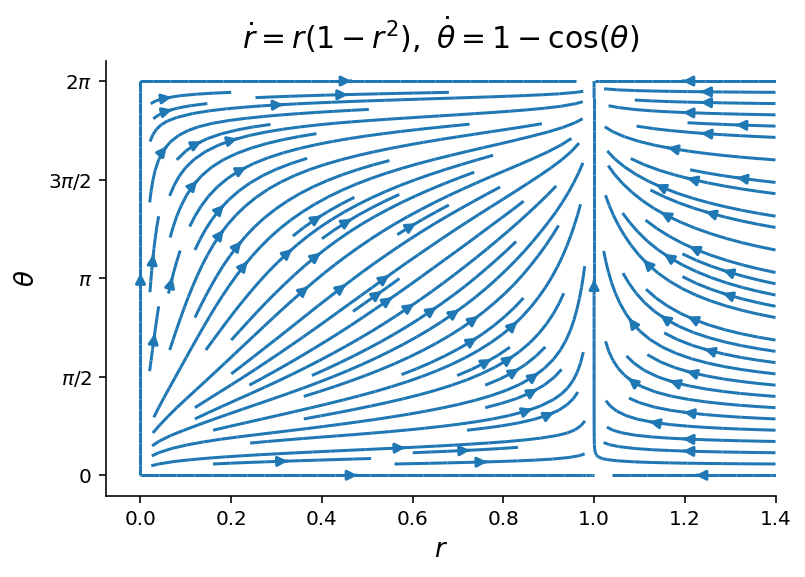

In [12]:
X = np.mgrid[theta_min:theta_max:np.pi/5, 0:1.5:0.1][::-1]

def f(X):
    r, theta = X
    return r * (1 - r ** 2), 1 - np.cos(theta)

Xdot = np.apply_along_axis(f, 0, X)

plt.streamplot(*X, *Xdot, density=1.2)
plt.yticks(yticks, yticks_labels)
plt.xlabel(r"$r$", fontsize=13)
plt.ylabel(r"$\theta$", fontsize=13)
plt.title(r"$\dot r=r(1-r^2), \ \dot\theta = 1 - \cos(\theta)$", fontsize=15);

From the graph above, we note that the fixed point $(r^*, \theta^*) = (1, 0)$ is attracting, with a *global* basing of attraction, except for the fixed point $(r^*, \theta^*) = (0, 0)$.

### Transforming the system from polar to cartesian coordinates

To graph the system in cartesian (xy) coordinates, consider the following identities

* $x=r\cos\theta$
* $y=r\sin\theta$
* $r^2 = x^2 + y^2$
* $r\dot r = x\dot x + y\dot y$
* $r\dot \theta = x\dot y - \dot x y$

Hence, to find the system in the xy plane, we solve the following system of equations for $\dot x,\dot y$:

$$
\begin{align*}
    \frac{x\dot x + y\dot y}{r} &= \dot r = r(1-r^2)\\
    \frac{x\dot y - \dot x y}{r^2} &= \dot\theta = 1 - \cos\theta
\end{align*}
$$

We obtain

$$
\begin{align*}
    \dot x &= x - y - r^2 x + y \cos\theta\\
    \dot y &= x + y - r^2 y - x \cos\theta
\end{align*}
$$

where $r^2 = x^2 + y^2$, $\cos\theta = x / r = x / \sqrt{x^2 + y^2}$

In [16]:
def f(X):
    x, y = X
    if x + y == 0:
        return 0
    
    r2 = x ** 2 + y ** 2
    cosθ = x / np.sqrt(r2)
    
    xdot = x - y - r2 * x + y * cosθ
    ydot = x + y - r2 * y - x * cosθ
    
    return xdot, ydot

In [52]:
vmin, vmax, step = -3 * np.pi / 5, 3 * np.pi / 5, np.pi / 50
X = np.mgrid[vmin:vmax:step,vmin:vmax:step][::-1]
Xdot = np.apply_along_axis(f, 0, X)

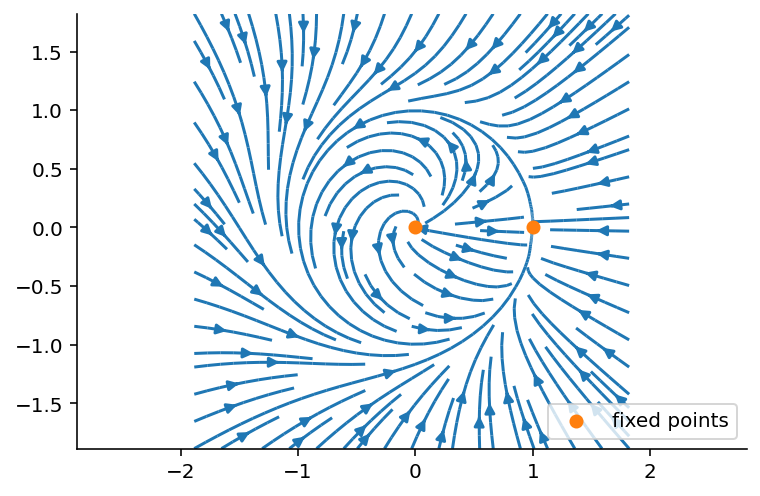

In [54]:
fixed_points = [[0, 1], [0, 0]]
plt.streamplot(*X, *Xdot, zorder=1, density=1.1)
plt.scatter(*fixed_points, c="tab:orange", zorder=2, label="fixed points")
plt.legend(loc="lower right")
plt.axis("equal");